In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [8]:
###Poista hävityt
###Poista pelien määrä
###Poista lineaarisen yhteyden sisältävät muuttujat

##Prepare data##

filename=r'NbaStats.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['Game Played'], axis=1)
data_train=data_train.drop(['Losses'], axis=1)
data_train=data_train.dropna()
#data_train['Game Played'].replace(to_replace=['M'], value=0,inplace=True)
#data_train['Sukupuoli'].replace(to_replace=['N'], value=1,inplace=True)

#print(data_train.head(10))
#df.head()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')


DESCRIBE DATA:
             Wins     WIN %  Minutes Played      Points  Field Goals Made  \
count  30.000000  30.00000       30.000000   30.000000         30.000000   
mean   41.000000   0.50000       48.283333  106.336667         39.606667   
std    12.222083   0.14908        0.164177    3.800860          1.393317   
min    21.000000   0.25600       48.100000   98.800000         36.700000   
25%    28.250000   0.34425       48.125000  103.500000         38.700000   
50%    44.000000   0.53700       48.250000  106.050000         39.200000   
75%    48.000000   0.58500       48.400000  109.375000         40.700000   
max    65.000000   0.79300       48.700000  113.500000         42.800000   

       Field Goals Attempted  Field Goal %  3 Point3 Point Field Goals Made  \
count              30.000000     30.000000                        30.000000   
mean               86.063333     46.026667                        10.486667   
std                 1.552192      1.504461                   

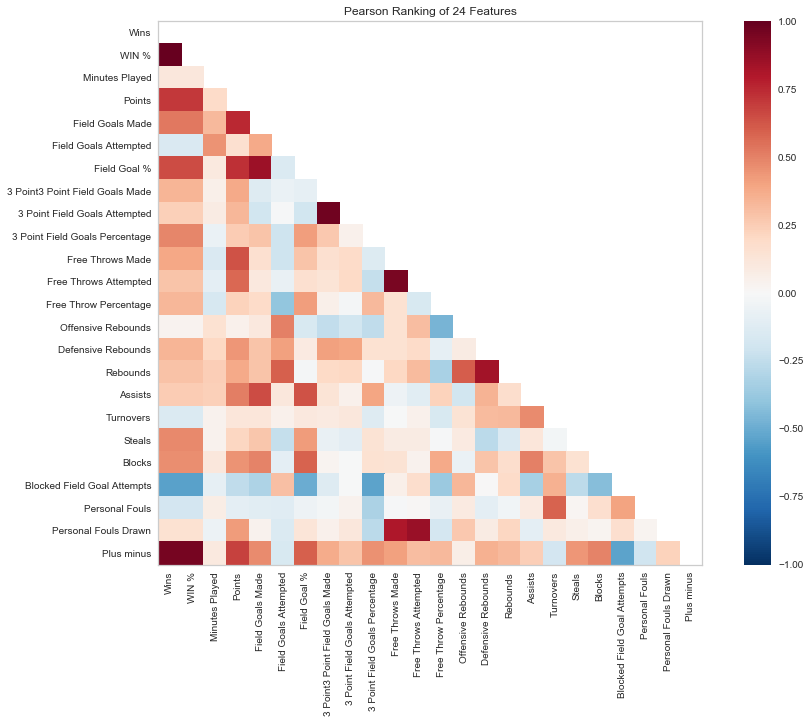

In [9]:
from yellowbrick.features import Rank2D


visualizer = Rank2D(algorithm="pearson",size=(1080, 720))
visualizer.fit_transform(data_train)# or df_scaled
visualizer.show()

#Win% & Wins


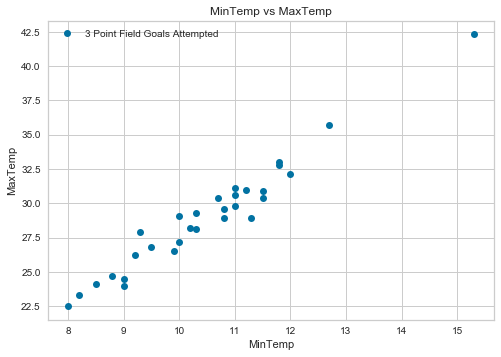

In [13]:
data_train.plot(x='3 Point3 Point Field Goals Made', y='3 Point Field Goals Attempted', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [ ]:
X_all = data_train.drop(['Disease'], axis=1)#data_train
#print(X_all)
y_all = data_train['Disease']
#print(y_all.head())

test_size=100
train_size=620

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)


    
from sklearn.neighbors import KNeighborsClassifier as KNN
    
k_range=range(10,500)
scores={}
scores_list=[]
error=[]

###Classifier###
for k in k_range:    
    clf = KNN(n_neighbors=k)

    ###Train###
    clf.fit(X_train, y_train)

    ###Predict###
    pre = clf.predict(X_test)

    ###Accuracy of Classifier###
    accuracy_score = metrics.accuracy_score(y_test, pre)
    print(k," ",accuracy_score)

    #Matrix of results
    result_matrix = metrics.confusion_matrix(pre,y_test)
   # print(k,"\n",result_matrix)
    
    scores[k] = metrics.accuracy_score(y_test,pre)

    scores_list.append(accuracy_score)
    
    #Error values
    error.append(np.mean(pre != y_test))
    
